In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Data.csv'  # Update this with your file path
data = pd.read_csv(file_path)

In [3]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Convert 'ScheduledDay' and 'AppointmentDay' to datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
# Summary statistics for numerical columns
summary_stats = data.describe()
print(f"\nSummary statistics:\n{summary_stats}")


Summary statistics:
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000 

In [7]:

# Check the distribution of the 'No-show' column
no_show_distribution = data['No-show'].value_counts()
print(f"\nNo-show distribution:\n{no_show_distribution}")


No-show distribution:
No     88208
Yes    22319
Name: No-show, dtype: int64


In [8]:
# Clean negative age values (replace with median age)
median_age = data['Age'].median()
data['Age'] = data['Age'].apply(lambda x: median_age if x < 0 else x)


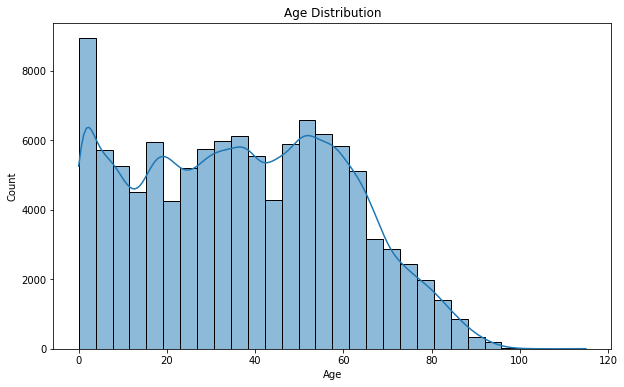

In [9]:
# Plot distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


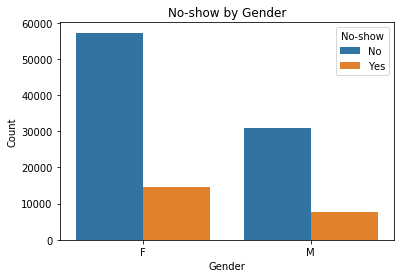

In [10]:
# Plot distribution of No-show based on Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', hue='No-show')
plt.title('No-show by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

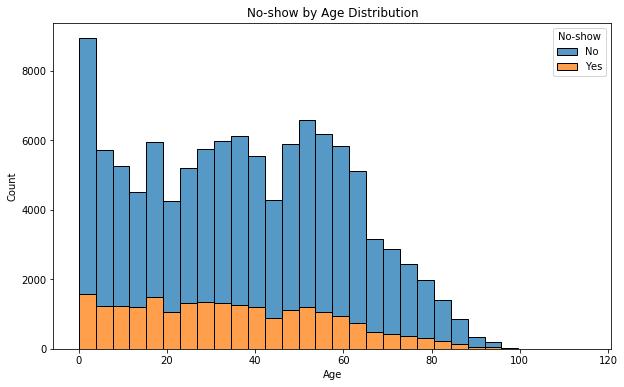

In [11]:
# Plot distribution of No-show based on Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='No-show', multiple='stack', bins=30)
plt.title('No-show by Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
# Analyze No-show based on health conditions (Hypertension, Diabetes, Alcoholism)
health_conditions = ['Hipertension', 'Diabetes', 'Alcoholism']


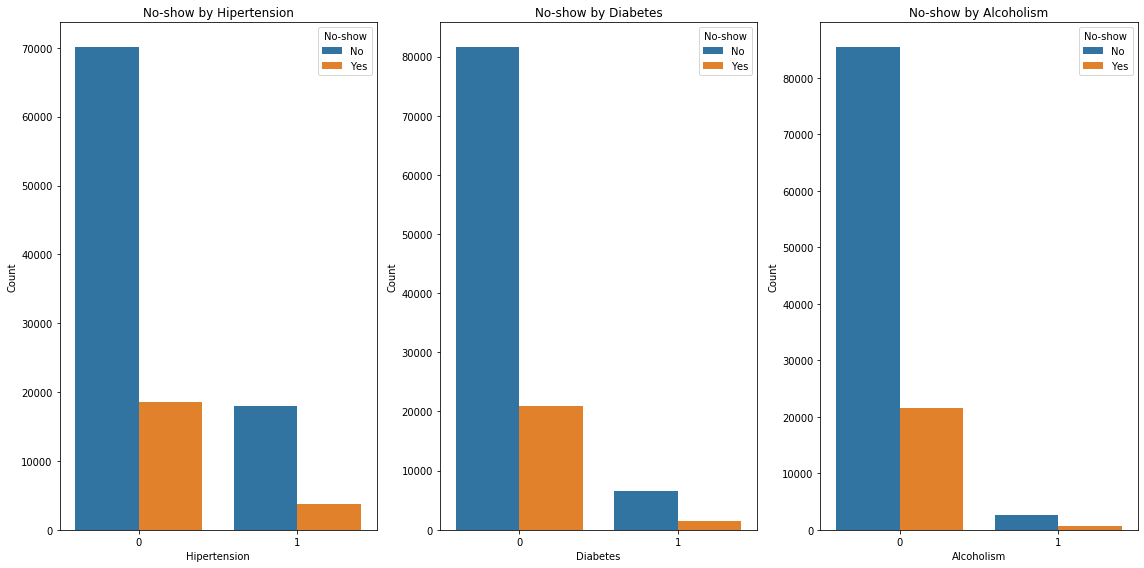

In [13]:
# Plot No-show rates for each health condition
plt.figure(figsize=(16, 8))
for i, condition in enumerate(health_conditions, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=condition, hue='No-show')
    plt.title(f'No-show by {condition}')
    plt.xlabel(condition)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


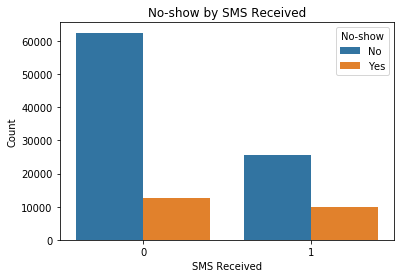

In [14]:
# Plot distribution of No-show based on SMS_received
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='SMS_received', hue='No-show')
plt.title('No-show by SMS Received')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.show()


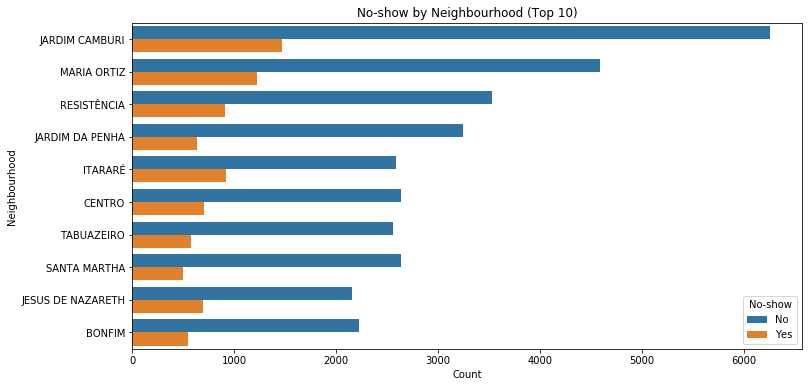

In [16]:
# No-show rate by Neighbourhood (Top 10 Neighbourhoods with the most appointments)
plt.figure(figsize=(12, 6))
top_neighbourhoods = data['Neighbourhood'].value_counts().head(10).index
sns.countplot(data=data[data['Neighbourhood'].isin(top_neighbourhoods)], 
              y='Neighbourhood', hue='No-show', order=top_neighbourhoods)
plt.title('No-show by Neighbourhood (Top 10)')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

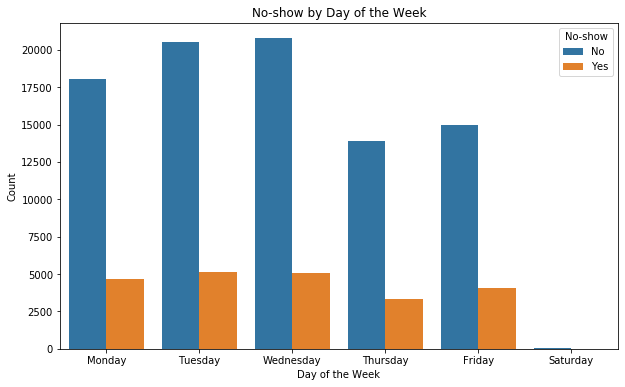

In [15]:
# Distribution of Appointment Day by Day of the Week
data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='AppointmentDayOfWeek', hue='No-show', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.title('No-show by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


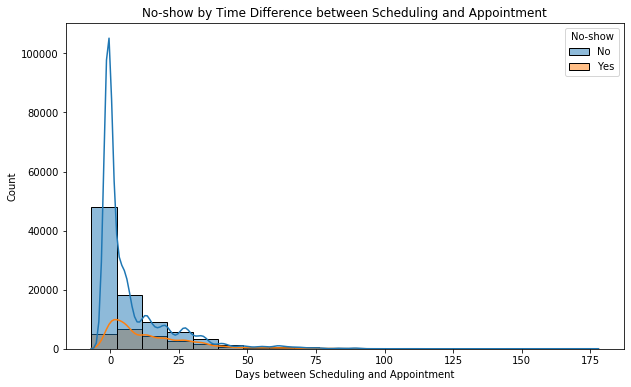

In [17]:

# Time difference between ScheduledDay and AppointmentDay
data['ScheduledToAppointmentDays'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='ScheduledToAppointmentDays', hue='No-show', bins=20, kde=True)
plt.title('No-show by Time Difference between Scheduling and Appointment')
plt.xlabel('Days between Scheduling and Appointment')
plt.ylabel('Count')
plt.show()

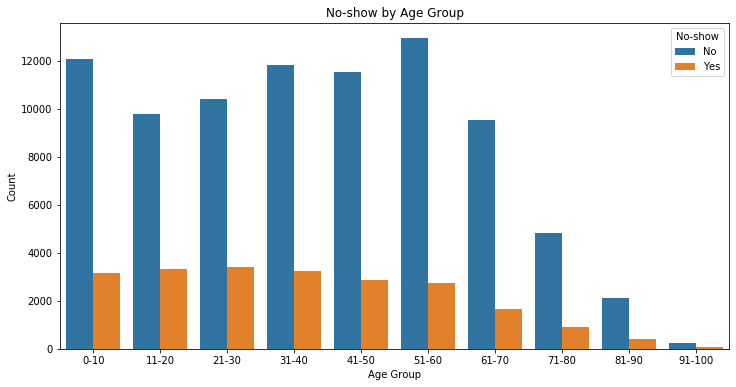

In [18]:
# No-show by Age Group
# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='AgeGroup', hue='No-show')
plt.title('No-show by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


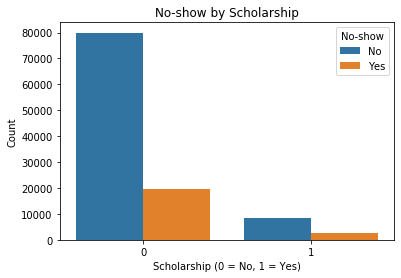

In [19]:
# No-show rate by Scholarship (indicating financial aid)
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Scholarship', hue='No-show')
plt.title('No-show by Scholarship')
plt.xlabel('Scholarship (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

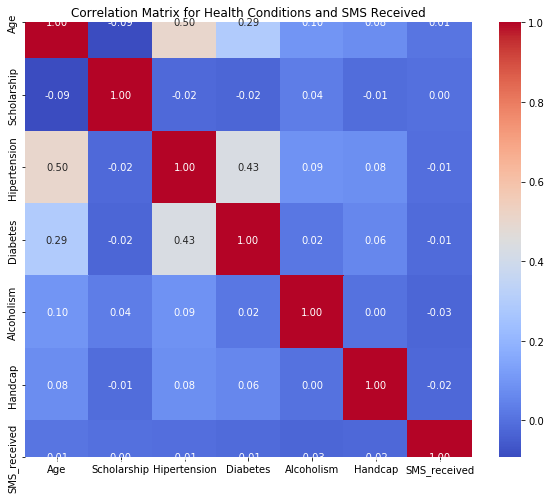

In [20]:
# Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Health Conditions and SMS Received')
plt.show()